## End-to-end Machine Learning Project

#### 1.Look at the big picture.
#### 2. Get the data.
#### 3. Discover and visualize the data to gain insights.
#### 4. Prepare the data for Machine Learning algorithms.
#### 5. Select a model and train it.
#### 6. Fine-tune your model.
#### 7. Present your solution.
#### 8. Launch, monitor, and maintain your system.

### 1. Look at the big picture.
The goal of this project is to build a model for predicting the median housing price in all districts in California.

1. What exactly is the business objective?

        Whether it is worth investing in a given area or not.

2. What the current solution looks like?

        The District housing price is currently estimated manually by experts.

3. Design your system

        3.1. It is a supervised learning problem. A regression task. It is also a univariate regression problem since we only trying to predict a single value for each district. Also, there is no continuous flow of data coming into the system. There is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should be just fine. 

        3.2. Select a performance measure.
        We will use RMSE and MAE as the measure.


### 2. Get the Data

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)

In [3]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

In [4]:
df = pd.read_csv(HOUSING_PATH+ '/housing.csv')

In [5]:
### Check the data structure 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only the total_bedrooms column has null values. We may delete those rows because only 107 rows.

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


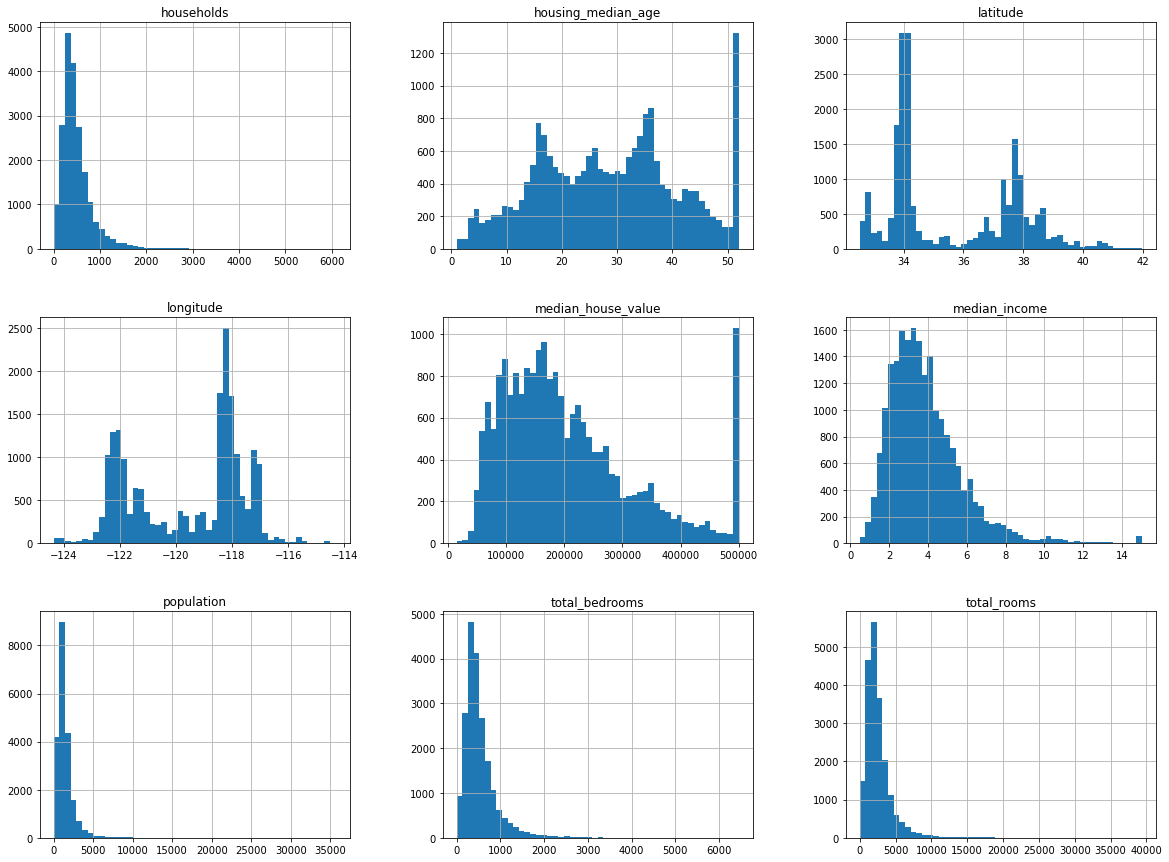

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins = 50, figsize = (20,15))
plt.show()

1. The median income has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes.
2. Lots of the houses' median house value fall into the 490000 to 500000 range. 
3. Lots of the houses' median house age fall into the 50 to 55 range. 
4. Many histograms above are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

#### Create a Test Set

In [12]:
from sklearn.model_selection import train_test_split
y = df.median_income
x = df.drop('median_income',axis=1)

To avoid generating a different test set each time, we run a train test split with setting the random_state as 42. 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,96500.0,INLAND


If the dataset is not big enough, we run the risk of introducing a significant sampling bias. We need to make sure the sampling is representative of the whole population. One way to achieve this is using the stratified sampling method. The population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. 

Suppose we chatted with experts who told you that the median income is a very important attribute to predict median housing prices. We may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. 

#### Stratified sampling

The following code creates an income category attribute by dividing the median income by 1.5, and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5.

In [38]:
import numpy as np
df["income_cat"] = np.ceil(df["median_income"] / 1.5) 
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

In [39]:
df["income_cat"]

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

Now you are ready to do stratified sampling based on the income category

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index] 
    strat_test_set = df.loc[test_index]

In [53]:
df["income_cat"].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [54]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [55]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

The test and train set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test and train set generated using purely random sampling is quite skewed.

In [56]:
# We remove the income_cat attribute so the data is back to its original state:
for set in (strat_train_set, strat_test_set): 
    set.drop(["income_cat"], axis=1, inplace=True)

In [57]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


### 3. Discover and visualize the data to gain insights.

Let us put the test set aside and we are only exploring the training set

In [58]:
df_train = strat_train_set.copy()

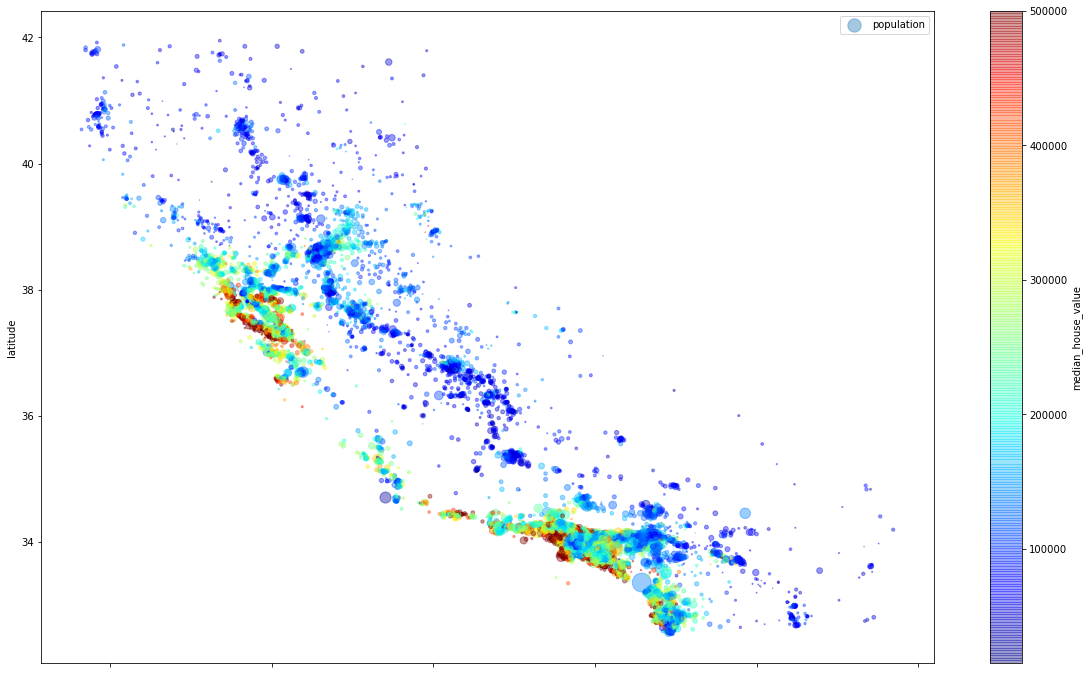

In [64]:
df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df_train["population"]/100, \
         label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize = (20,12)) 

plt.legend()

We can see that the radius of each circle represents the district’s population, and the color represents the price. We will use a predefined color map called jet, which ranges from blue to red.

It tells us that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well. 

In [61]:
corr_matrix = df_train.corr()

In [62]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

A small negative correlation between the latitude and the median house value. Median_income is positively correlated to the median house value. The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb28c12bbb0>,
      dtype=object)

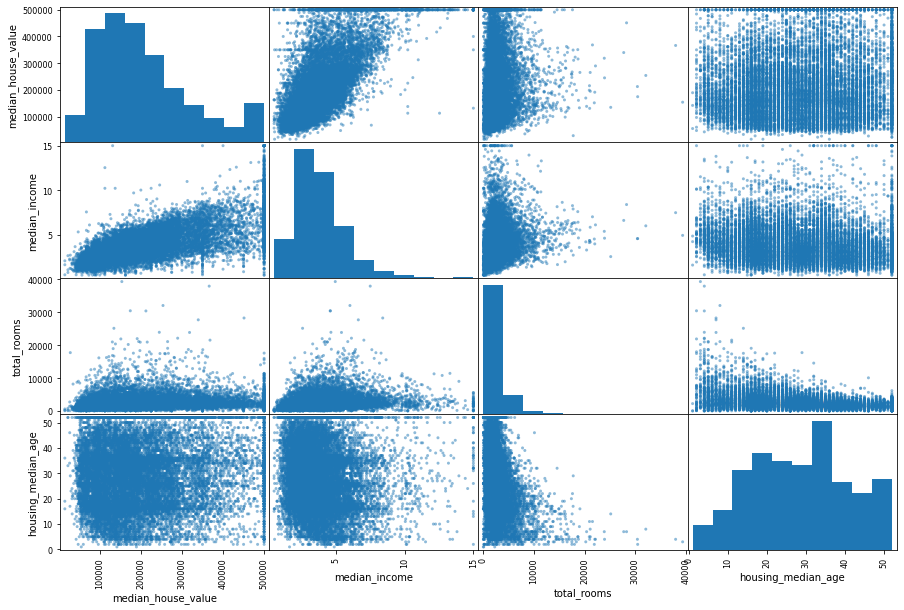

In [70]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(df_train[attributes],  figsize=(15, 10))

The most promising attribute to predict the median house value is the median income, so let’s check the correlation between these two variables.

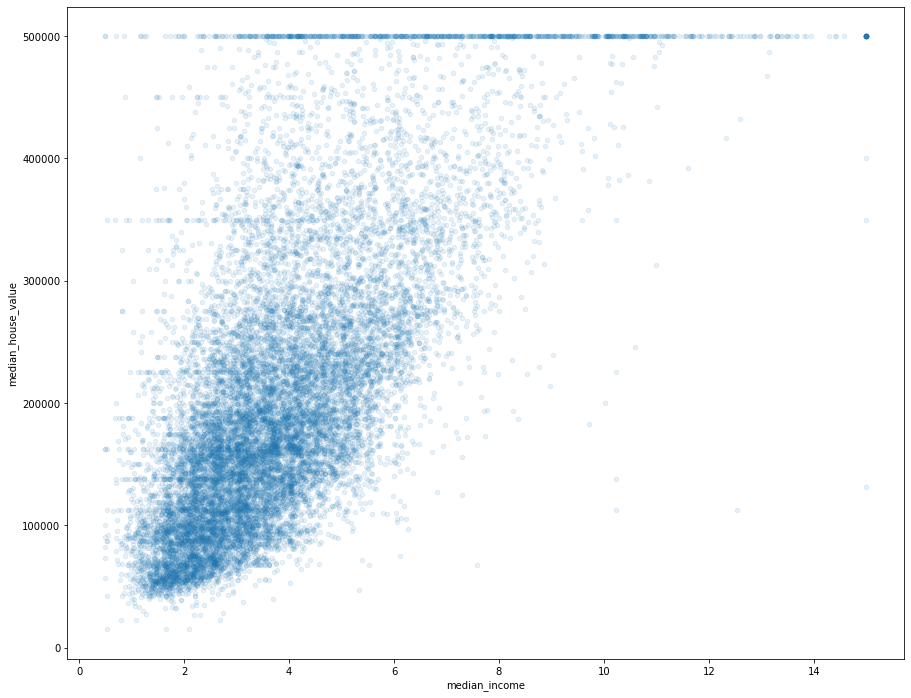

In [74]:
df_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize = (15,12))

There is a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.


#### Create new features based on the demands of the model. 

For example, the total number of rooms is not very useful if you don’t know how many households there are. We can calculate the number of rooms per household. 

In [75]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"] 
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"] 
df_train["population_per_household"]=df_train["population"]/df_train["households"]

In [76]:
corr_matrix = df_train.corr()

In [77]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### 4. Prepare the data for Machine Learning algorithms.

In [78]:
df_train = strat_train_set.copy()
train_input = df_train.drop("median_house_value", axis=1)
train_label = strat_train_set["median_house_value"].copy()

#### Data Cleaning
1. Remove null values
We have many options here to deal with the problem. I will choose to fill the null values with median of the number of bedrooms.

In [107]:
median = train_input["total_bedrooms"].median()
train_input["total_bedrooms"] = train_input["total_bedrooms"].fillna(median)

If there are more than one columns need to fill null values with the median, then we can use the Scikit-Learn handy class SimpleImputer

In [108]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [109]:
# Drop the categorical column 'ocean_proximity', just leave the numerical outputs.
housing_num = train_input.drop("ocean_proximity", axis=1)

In [110]:
imputer.fit(housing_num)

SimpleImputer()

In [111]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now we can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:

In [112]:
X = imputer.transform(housing_num)

In [113]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

2. Handling Categorical Attributes

Turn the strings in the "ocean_proximity" column into numbers.

In [114]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = train_input["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [115]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Encode the categories as one-hot vectors

In [116]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [117]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the LabelBinarizer class:

In [118]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat) 
housing_cat_1hot.toarray()

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

3. Custom Transformers

Write your own tasks such as custom cleanup operations or combining specific attributes, all you need is to create a class and implement three methods: fit() (returning self), transform(), and fit_transform(). 

Create rooms_per_household, bedrooms_per_room", and "population_per_household" using the class CombinedAttributesAdder. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and sav‐ ing you a lot of time).


In [120]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(df_train.values)

4. Feature Scaling

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization. 

5. Transformation Pipelines

We can use the following pipeline to do all the data transformation: fill null values, add more attributes, and scale the numerical features.

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [124]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

We now have a pipeline for numerical values, and we also need to apply the LabelBinarizer on the categorical values.

A selector transformer simply transforms the data by selecting the desired attributes (numerical or categorical), dropping the rest, and converting the resulting DataFrame to a NumPy array. 

In [130]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

We give it a list of transformers (which can be entire transformer pipelines), and when its transform() method is called it runs each transformer’s transform() method in parallel, waits for their output, and then concatenates them and returns the result (and of course calling its fit() method calls all each transformer’s fit() method). A full pipeline handling both numerical and categorical attributes may look like this:

In [140]:
train_input

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [145]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [146]:
from sklearn.pipeline import FeatureUnion 
from sklearn.base import BaseEstimator, TransformerMixin

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),('label_binarizer', MyLabelBinarizer())])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline)])

train_prepared = full_pipeline.fit_transform(train_input)

### 5. Select a model and train it.


In [147]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_label)

LinearRegression()

In [148]:
some_data = df_train.iloc[:5]
some_labels = train_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared)) 
print("Labels:\t\t", list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

In [150]:
from sklearn.metrics import mean_squared_error
train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_label, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Train a decision tree regression

In [153]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_label)

train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_label, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Better Evaluation Using Cross-Validation

In [154]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_prepared, train_label, scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[69344.94738801 68034.63727437 71677.82435466 69145.70540483
 71105.59374582 73969.58518994 70358.63250387 69990.03161723
 76169.8753551  69690.74206912]
70948.75749029474
2326.0892878844247


Now the Decision Tree doesn’t look as good as it did earlier. Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.

In [155]:
scores = cross_val_score(lin_reg, train_prepared, train_label, scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
69052.46136345083
2731.6740017983493


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.
Let us try Random Forest model.

In [156]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_label) 


scores = cross_val_score(forest_reg, train_prepared, train_label, scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[49734.15858913 47806.59619084 49901.6061354  52122.01819598
 49410.41680769 53147.99804095 48648.1825559  48020.47743156
 53068.85655256 50191.16155532]
50205.1472055326
1855.5679462397695


Random Forests looks good. The score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

### 6. Fine-tune your model.

#### Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values.


In [193]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, train_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe gressor hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! 

In [158]:
grid_search.best_params_
grid_search.best_estimator_
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63984.19129426239 {'max_features': 2, 'n_estimators': 3}
55778.03569175924 {'max_features': 2, 'n_estimators': 10}
52962.11410966025 {'max_features': 2, 'n_estimators': 30}
60156.97596890521 {'max_features': 4, 'n_estimators': 3}
52651.60727607578 {'max_features': 4, 'n_estimators': 10}
50690.204620256955 {'max_features': 4, 'n_estimators': 30}
58691.82402553758 {'max_features': 6, 'n_estimators': 3}
51673.579525235495 {'max_features': 6, 'n_estimators': 10}
49986.283446290225 {'max_features': 6, 'n_estimators': 30}
59110.91115651328 {'max_features': 8, 'n_estimators': 3}
52541.78424728213 {'max_features': 8, 'n_estimators': 10}
50287.242206622665 {'max_features': 8, 'n_estimators': 30}
62680.44922329939 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54330.854953474896 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60150.85470265223 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52609.305342735024 {'bootstrap': False, 'max_features': 3, 'n_estimator

#### Analyze the Best Models and Their Errors
You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [159]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.02373255e-02, 6.36257130e-02, 4.23532892e-02, 2.26016930e-02,
       1.75429251e-02, 2.03318873e-02, 1.70913949e-02, 3.26401025e-01,
       5.21440931e-02, 1.04295798e-01, 9.11332571e-02, 8.07763678e-03,
       1.56640839e-01, 4.52468290e-05, 3.07947828e-03, 4.39839710e-03])

In [160]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32640102547928723, 'median_income'),
 (0.15664083902459472, 'INLAND'),
 (0.104295798269931, 'pop_per_hhold'),
 (0.09113325708323707, 'bedrooms_per_room'),
 (0.0702373254589011, 'longitude'),
 (0.06362571303539594, 'latitude'),
 (0.052144093132001475, 'rooms_per_hhold'),
 (0.04235328918543445, 'housing_median_age'),
 (0.02260169300439122, 'total_rooms'),
 (0.02033188730281861, 'population'),
 (0.01754292508522542, 'total_bedrooms'),
 (0.017091394944405758, 'households'),
 (0.0080776367813614, '<1H OCEAN'),
 (0.004398397103698265, 'NEAR OCEAN'),
 (0.0030794782803094324, 'NEAR BAY'),
 (4.524682900691869e-05, 'ISLAND')]

With this information, we want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).

### 7. Present your solution.

In [161]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [163]:
final_rmse

48759.84010529581

you need to present your solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what your system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements.

### 8. Launch, monitor, and maintain your system.

###  Exercises 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = [
        {'kernel': ['linear'], 'C': [10.]},
                                     #100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0],
                                  #10., 30., 100., 300., 1000.0],
         'gamma': [0.01]}
                   #0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(train_prepared, train_label)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid=[{'C': [10.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0], 'gamma': [0.01], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [165]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

84654.24944894915

That's much worse than the RandomForestRegressor. Let's check the best hyperparameters found:

In [166]:
grid_search.best_params_

{'C': 10.0, 'kernel': 'linear'}

###  Exercises 2.
Try replacing GridSearchCV with RandomizedSearchCV.

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(train_prepared, train_label)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb260e4d100>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb270deda00>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [170]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.960710084146

In [171]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

Let's look at the exponential distribution we used, with scale=1.0. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

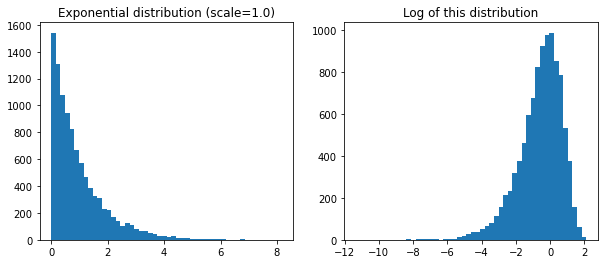

In [172]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for C looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

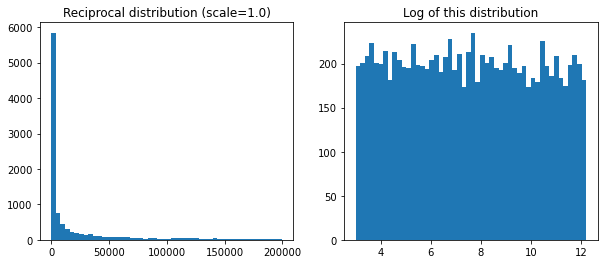

In [173]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

###  Exercises 3.
Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [174]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [175]:
k = 5

In [176]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [177]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [178]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.32640102547928723, 'median_income'),
 (0.15664083902459472, 'INLAND'),
 (0.104295798269931, 'pop_per_hhold'),
 (0.09113325708323707, 'bedrooms_per_room'),
 (0.0702373254589011, 'longitude')]

In [179]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [180]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(df_train)

In [181]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281, -0.61493744, -0.08649871,  0.1349975 ,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.78819259,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.38346663,  0.        ]])

In [183]:
train_prepared[0:3, top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

###  Exercises 4
Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [184]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [185]:
prepare_select_and_predict_pipeline.fit(df_train, train_label)

Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['longitude',
                                                                                                     'latitude',
                                                                                                     'housing_median_age',
                                                                                                     'total_rooms',
                                                                                                     'total_bedrooms',
                                                                                                     'population',
                                                                                                     'households',
          

In [186]:
some_data = df_train.iloc[:4]
some_labels = train_label.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [185612.87639867 341319.41028962 172722.22181581  55828.93452619]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


###  Exercises 5
Question: Automatically explore some preparation options using GridSearchCV.

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]


In [194]:

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, cv=5,
                                scoring='neg_mean_squared_error', param_grid, verbose=2, n_jobs=4)
grid_search_prep.fit(df_train, train_label)

SyntaxError: positional argument follows keyword argument (<ipython-input-194-be7a96081968>, line 2)

In [ ]:
grid_search_prep.best_params_